In [1]:
# pip install seaborn

In [2]:
# import necessary modules to run code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats

In [3]:
#importing secchi data files
file_path = '/home/jovyan/EmmaIacono/194903-202105_Cast_nccsv.csv'
secchi= pd.read_csv(file_path, skiprows = 218, low_memory= False)
#file contains metadata row 1-219
#so we are skipping indices 0-218

# Create a new dataframe called df so that we can add a new 'Distance_with_*' column
# Filter data by year
df = secchi[secchi['Year']>2006]
df['Distance_with_*'] = df['Distance'] * -1.852

# Create a new dataframe that contains all the columns where distance_with_* is less than equal to 150
df_inshore = df[(df['Distance_with_*']<=150)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 450
df_offshore = df[(df['Distance_with_*']>450)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 150 and less than/ equal to 450
cond1 = df['Distance_with_*']<=450
cond2 = df['Distance_with_*']>150
df_transition = df[cond1 & cond2]



### In shore ###

# Group filtered data by year
df_inshore_year = df_inshore.groupby('Year')

# Calculate mean of secchi data by year
df_inshore_secchi_mean = df_inshore_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
inshore_N = df_inshore_year.Secchi.count().values

# Plot x versus y
x_inshore = df.Year.unique()
y_inshore = df_inshore_year.Secchi.mean()
y_inshore_std_error = df_inshore_year.Secchi.std()/np.sqrt(inshore_N)



### Transition shore ###

# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate mean of secchi data by year
df_transition_secchi_mean = df_transition_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df.Year.unique()
y_transition = df_transition_year.Secchi.mean()   
y_transition_std_error = df_transition_year.Secchi.std()/np.sqrt(transition_N)



### Off shore ###

# Group filtered data by year
df_offshore_year = df_offshore.groupby('Year')
                                                                                                                                                                                                                            
# Calculate mean of secchi data by year
df_offshore_secchi_mean = df_offshore_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
offshore_N = df_offshore_year.Secchi.count().values

# Plot x versus y
x_offshore = df_year_values
y_offshore = df_offshore_year.Secchi.mean()
y_offshore_std_error = df_offshore_year.Secchi.std()/(np.sqrt(offshore_N))


/tmp/ipykernel_476/3154444516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_with_*'] = df['Distance'] * -1.852


In [4]:
# ### Plotting ###

# inshore = sns.regplot(x=x_inshore, 
#                       y=y_inshore, 
#                       scatter_kws={"color": "darkslateblue"}, 
#                       line_kws={"color": "aquamarine"},
#                       marker = '*')

# transition = sns.regplot(x=x_transition, 
#                       y=y_transition, 
#                       scatter_kws={"color": "orange"}, 
#                       line_kws={"color": "aquamarine"},
#                          marker = '>')

# offshore = sns.regplot(x=x_offshore, 
#                       y=y_offshore, 
#                       scatter_kws={"color": "green"}, 
#                       line_kws={"color": "aquamarine"},
#                        marker = '.')



# chart = sns.regplot(x=x, y=y, 
#                     scatter_kws={"color": "darkslateblue"}, 
#                     line_kws={"color": "aquamarine"})

# reg_line_xarray = chart.get_lines()[0].get_xdata()
# reg_line_yarray= chart.get_lines()[0].get_ydata()
# print('Slope: ', (reg_line_yarray[1]-reg_line_yarray[0])/(reg_line_xarray[1]-reg_line_xarray[0]))
# print('Intercept: ', reg_line_yarray[0]+ 0.081*reg_line_xarray[0])
# # chart.text(1969,57,'y = -0.0807x + 181.3705', style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

# chart.set_title('Secchi Disk Depth: 1969-2021', fontdict={'size': 15, 'weight': 'bold'})

# chart.set_xlabel('Year', fontdict={'size': 12})
# chart.set_ylabel('Secchi Depth (meters)', fontdict={'size': 12})

plt.show()
# fig = chart.get_figure()
# fig.savefig('./figures/secchi_disk_mean1.png')

# chart.set_title('Secchi Disk Depth: 1969-2021', fontdict={'size': 15, 'weight': 'heavy', 'family':'Sans-serif'})
# chart.set_xlabel('Year', fontdict={'size': 12, 'family':'sans-serif'})
# chart.set_ylabel('Secchi Depth (meters)', fontdict={'size': 12, 'family':'sans-serif'})
# plt.show()

In [5]:
### Upgrade Seaborn library, dependancies = NumPY, Pandas, Matplotlib
# !python -m pip uninstall seaborn --yes
#pip install git+https://github.com/mwaskom/seaborn.git

In [6]:
# pip install seaborn

In [7]:
# ### Inshore ###
# # Centering error around mean
# error_1 = 0.5*y_inshore_std_error 
# lower_1 = 1/df_inshore_secchi_mean - error_1
# upper_1 = 1/df_inshore_secchi_mean + error_1

# x = df_year_values
# y_inshore_mean = df_inshore_secchi_mean

# ### Transition ###
# #Centering error around mean
# error_2 = 0.5*y_transition_std_error 
# lower_2 = df_transition_secchi_mean - error_2
# upper_2 = df_transition_secchi_mean + error_2

# x = df_year_values
# y_transition_mean = df_transition_secchi_mean

# ### Offshore ###
# # Centering error around mean
# error_3 = 0.5*y_offshore_std_error 
# lower_3 = df_offshore_secchi_mean - error_3
# upper_3 = df_offshore_secchi_mean + error_3

# x = df_year_values
# y_offshore_mean = df_offshore_secchi_mean


# ### Plotting ###

# # Draw plot with error band and extra formatting to match seaborn style
# fig, ax = plt.subplots(figsize=(9,5))

# ax.plot(x, 1/y_inshore_mean, label='Inshore Mean', color='purple')
# ax.plot(x, lower_1, color='purple', alpha=0.1)
# ax.plot(x, upper_1, color='purple', alpha=0.1)
# ax.fill_between(x, lower_1, upper_1, color='purple', alpha=0.2)

# ax.plot(x, 1/y_transition_mean, label='Transition Mean', color='orange')
# # ax.plot(x, lower_2, color='tab:orange', alpha=0.1)
# # ax.plot(x, upper_2, color='tab:orange', alpha=0.1)
# # ax.fill_between(x, lower_2, upper_2, color='orange', alpha=0.2)

# ax.plot(x, 1/y_offshore_mean, label='Offshore Mean', color='tab:green')
# # ax.plot(x, lower_3, color='tab:green', alpha=0.1)
# # ax.plot(x, upper_3, color='tab:green', alpha=0.1)
# # ax.fill_between(x, lower_3, upper_3, color='green', alpha=0.2)

# ax.legend()
# # ax.legend(labels=['Inshore','Transition','Offshore'])
# ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
# ax.set_ylabel(('Annual Mean Secchi Depth (m)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title(('Temporal Changes in Annual Mean Secchi Depth'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})


# plt.show()
# # fig = chart.get_figure()
# # fig.savefig('./figures/mean_secchi_depth.png')

In [8]:

# filtered_data_start_year = int(filtered_data['Year'].iloc[0])
# filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

# plot_title = 'Offshore Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# # here, we are changing the x axis to year instead of distance from shore
# plot_x = filtered_data['Secchi']
# plot_y = filtered_data['Year']



/tmp/ipykernel_476/3863382739.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=mdf, x="variable", y="value", palette = 'crest')


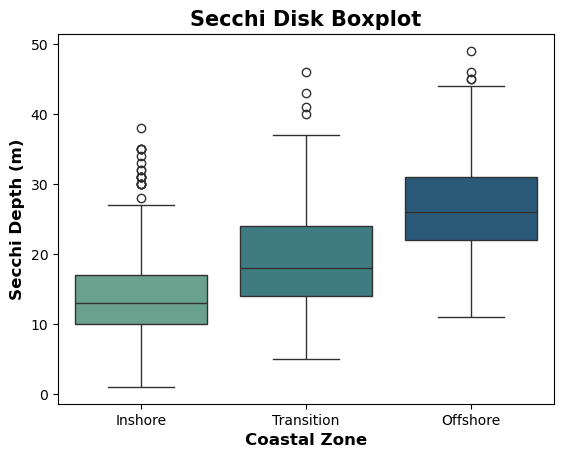

In [23]:
### Boxplots ###

shore_distance = ['Inshore', 'Transition', 'Offshore']

df_boxplots = []

# Filtering data from years 2007-2021 for inshore
ds_1 = df_inshore[df_inshore['Year']>2006].Secchi      # Taking the 'Secchi column'
df_1 = ds_1.to_frame(name=shore_distance[0])           # Converting data series to data frame


# Filtering data from years 2007-2021 for transition
ds_2 = df_transition[df_transition['Year']>2006].Secchi      # Taking the 'Secchi column'
df_2 = ds_2.to_frame(name=shore_distance[1])                 # Converting data series to data frame


# Filtering data from years 2007-2021 for offshore
ds_3 = df_offshore[df_offshore['Year']>2006].Secchi       # Taking the 'Secchi column'
df_3 = ds_3.to_frame(name=shore_distance[2])             # Converting data series to data frame

# Prepping data for boxplots
cdf = pd.concat([df_1, df_2, df_3])        # Concatenate dataframes
mdf = pd.melt(cdf)         # Melt dataframes

# Plotting boxplot
ax = sns.boxplot(data=mdf, x="variable", y="value", palette = 'crest')

ax.set_title('Secchi Disk Boxplot', fontdict={'size': 15, 'weight': 'bold'})

ax.set_xlabel('Coastal Zone', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

filtered_data_start_year = int(df_inshore[df_inshore['Year']>2006].Year.iloc[0])
filtered_data_end_year = int(df_inshore[df_inshore['Year']>2006].Year.iloc[-1])

plt.show()

fig = ax.get_figure()
fig.savefig('./figures/Boxplot_Secchi_depth.png')